In [1]:
#数据生成训练集与测试集
#猫狗数据
from keras.preprocessing.image import ImageDataGenerator

IMSIZE = 224
train_generator = ImageDataGenerator(rescale=1. / 255).flow_from_directory(
    '../../data/dogs-vs-cats/smallData/train',
    target_size=(IMSIZE, IMSIZE),
    batch_size=10,
    class_mode='categorical'
)

validation_generator = ImageDataGenerator(rescale=1. / 255).flow_from_directory(
    '../../data/dogs-vs-cats/smallData/validation',
    target_size=(IMSIZE, IMSIZE),
    batch_size=10,
    class_mode='categorical'
)


Using TensorFlow backend.


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [2]:
#展示X（图像）与Y（因变量）
import numpy as np

X, Y = next(validation_generator)
print(X.shape)
print(Y.shape)
Y[:, 0]

(10, 224, 224, 3)
(10, 2)


array([0., 0., 1., 1., 1., 1., 1., 0., 0., 0.], dtype=float32)

<Figure size 432x288 with 0 Axes>

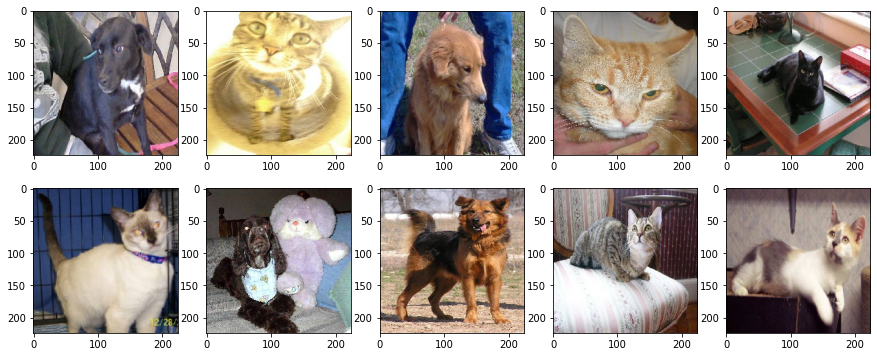

In [3]:
#展示图像
from matplotlib import pyplot as plt

plt.figure()
fig, ax = plt.subplots(2, 5)
fig.set_figheight(6)
fig.set_figwidth(15)
ax = ax.flatten()
X, Y = next(validation_generator)
for i in range(10): ax[i].imshow(X[i, :, :, ])

In [4]:
#带有BN的逻辑回归模型
from keras.layers import Flatten, Input, BatchNormalization, Dense
from keras import Model

input_layer = Input([IMSIZE, IMSIZE, 3])
x = input_layer
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(2, activation='softmax')(x)
output_layer = x
model1 = Model(input_layer, output_layer)
model1.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 301058    
Total params: 301,070
Trainable params: 301,064
Non-trainable params: 6
_________________________________________________________________


In [5]:
#带有BN的逻辑回归模型与拟合
from keras.optimizers import Adam

model1.compile(loss='categorical_crossentropy',
               optimizer=Adam(lr=0.01),
               metrics=['accuracy'])
model1.fit_generator(train_generator,
                     epochs=200,
                     validation_data=validation_generator)


Epoch 1/200
200/200 [==============================] - 5s 27ms/step - loss: 105.3613 - accuracy: 0.5410 - val_loss: 1.1065 - val_accuracy: 0.4970
Epoch 2/200
200/200 [==============================] - 4s 21ms/step - loss: 0.8420 - accuracy: 0.6145 - val_loss: 1.8326 - val_accuracy: 0.5130
Epoch 3/200
200/200 [==============================] - 4s 22ms/step - loss: 0.7313 - accuracy: 0.6315 - val_loss: 0.9064 - val_accuracy: 0.5240
Epoch 4/200
200/200 [==============================] - 4s 20ms/step - loss: 0.6567 - accuracy: 0.6645 - val_loss: 1.0102 - val_accuracy: 0.5420
Epoch 5/200
200/200 [==============================] - 4s 22ms/step - loss: 0.6120 - accuracy: 0.6780 - val_loss: 0.9201 - val_accuracy: 0.5490
Epoch 6/200
200/200 [==============================] - 4s 21ms/step - loss: 0.6144 - accuracy: 0.6935 - val_loss: 0.7779 - val_accuracy: 0.5310
Epoch 7/200
200/200 [==============================] - 5s 26ms/step - loss: 0.6051 - accuracy: 0.6890 - val_loss: 0.9788 - val_accura

KeyboardInterrupt: 

In [6]:
#扩展，带有BN的宽模型
from keras.layers import Conv2D, MaxPooling2D

n_channel = 100
input_layer = Input([IMSIZE, IMSIZE, 3])
x = input_layer
x = BatchNormalization()(x)
x = Conv2D(n_channel, [2, 2], activation='relu')(x)
x = MaxPooling2D([16, 16])(x)
x = Flatten()(x)
x = Dense(2, activation='softmax')(x)
output_layer = x
model2 = Model(input_layer, output_layer)
model2.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 223, 223, 100)     1300      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 100)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16900)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 33802     
Total params: 35,114
Trainable params: 35,108
Non-trainable params: 6
______________________________________________________

In [7]:
# 带有BN的宽模型的编译与拟合
model2.compile(loss='categorical_crossentropy',
               optimizer=Adam(lr=0.001),
               metrics=['accuracy'])
model2.fit_generator(train_generator,
                     epochs=200,
                     validation_data=validation_generator)

Epoch 1/200
200/200 [==============================] - 11s 57ms/step - loss: 0.7323 - accuracy: 0.6060 - val_loss: 0.5928 - val_accuracy: 0.6870
Epoch 2/200
200/200 [==============================] - 11s 54ms/step - loss: 0.5565 - accuracy: 0.7190 - val_loss: 0.5099 - val_accuracy: 0.7030
Epoch 3/200
200/200 [==============================] - 11s 54ms/step - loss: 0.5007 - accuracy: 0.7675 - val_loss: 0.8235 - val_accuracy: 0.6700
Epoch 4/200
200/200 [==============================] - 11s 54ms/step - loss: 0.4883 - accuracy: 0.7645 - val_loss: 0.7494 - val_accuracy: 0.7030
Epoch 5/200
200/200 [==============================] - 11s 54ms/step - loss: 0.4494 - accuracy: 0.7895 - val_loss: 0.3616 - val_accuracy: 0.7250
Epoch 6/200
200/200 [==============================] - 11s 54ms/step - loss: 0.4173 - accuracy: 0.8115 - val_loss: 0.4335 - val_accuracy: 0.7090
Epoch 7/200
200/200 [==============================] - 11s 55ms/step - loss: 0.3961 - accuracy: 0.8225 - val_loss: 1.2065 - val_ac

KeyboardInterrupt: 

In [8]:
#带有BN的深度模型
n_channel = 20
input_layer = Input([IMSIZE, IMSIZE, 3])
x = input_layer
x = BatchNormalization()(x)

for _ in range(7):
    x = Conv2D(n_channel, [2, 2], padding='same', activation='relu')(x)
    x = MaxPooling2D([2, 2])(x)
x = Flatten()(x)
x = Dense(2, activation='softmax')(x)
output_layer = x
model3 = Model(input_layer, output_layer)
model3.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 20)      260       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 20)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 20)      1620      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 20)        1620

In [9]:
#带有BN的深度模型编译与拟合
from keras.optimizers import Adam

model3.compile(loss='categorical_crossentropy',
               optimizer=Adam(lr=0.01),
               metrics=['accuracy'])
model3.fit_generator(train_generator,
                     epochs=200,
                     validation_data=validation_generator)

Epoch 1/200
200/200 [==============================] - 8s 40ms/step - loss: 0.6959 - accuracy: 0.4875 - val_loss: 0.6901 - val_accuracy: 0.5000
Epoch 2/200
200/200 [==============================] - 7s 37ms/step - loss: 0.6932 - accuracy: 0.5140 - val_loss: 0.6572 - val_accuracy: 0.5000
Epoch 3/200
200/200 [==============================] - 8s 39ms/step - loss: 0.6944 - accuracy: 0.4940 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 4/200
200/200 [==============================] - 7s 35ms/step - loss: 0.6940 - accuracy: 0.5030 - val_loss: 0.6855 - val_accuracy: 0.5000
Epoch 5/200
200/200 [==============================] - 8s 41ms/step - loss: 0.6944 - accuracy: 0.4880 - val_loss: 0.6956 - val_accuracy: 0.5000
Epoch 6/200
186/200 [==========================>...] - ETA: 0s - loss: 0.6936 - accuracy: 0.4978

KeyboardInterrupt: 